Visualizing Gradient Boosting Decision Trees

In [0]:
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import sklearn
import graphviz
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, export_graphviz


In [0]:
#data
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]

In [14]:
#fit
model = xgb.XGBClassifier()
model.fit(X, y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

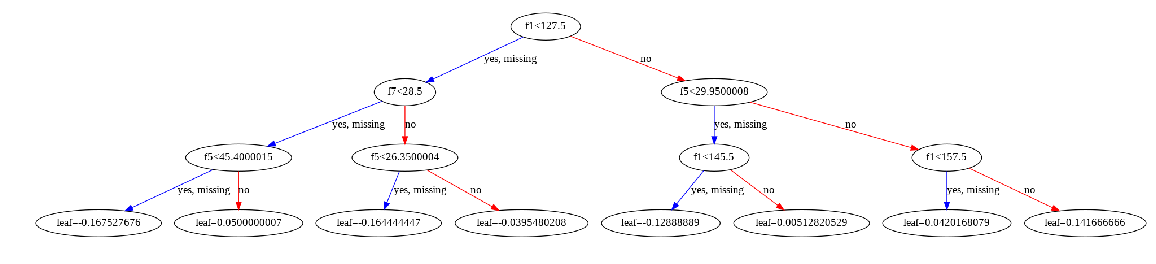

In [24]:
# plot single tree
xgb.plot_tree(model)

fig = plt.gcf()
fig.set_size_inches(20,60)

plt.show()

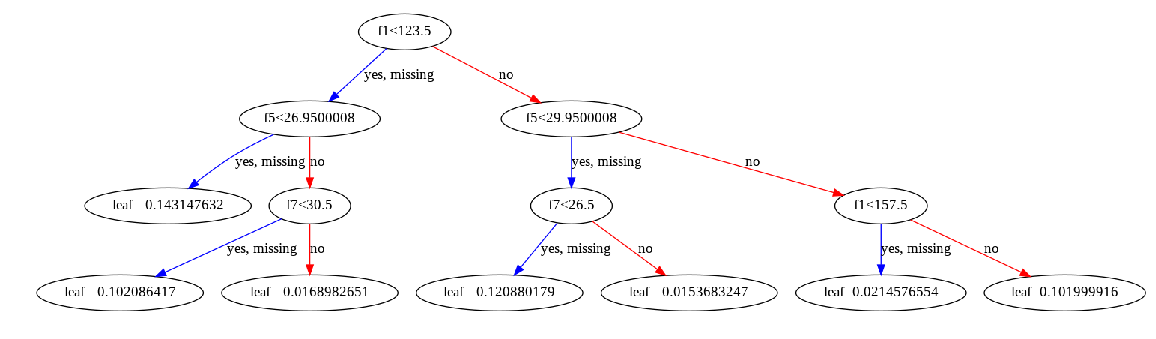

In [30]:
xgb.plot_tree(model,num_trees=4)
#plotting 5th boosted tree

fig = plt.gcf()
fig.set_size_inches(20,60)

plt.show()

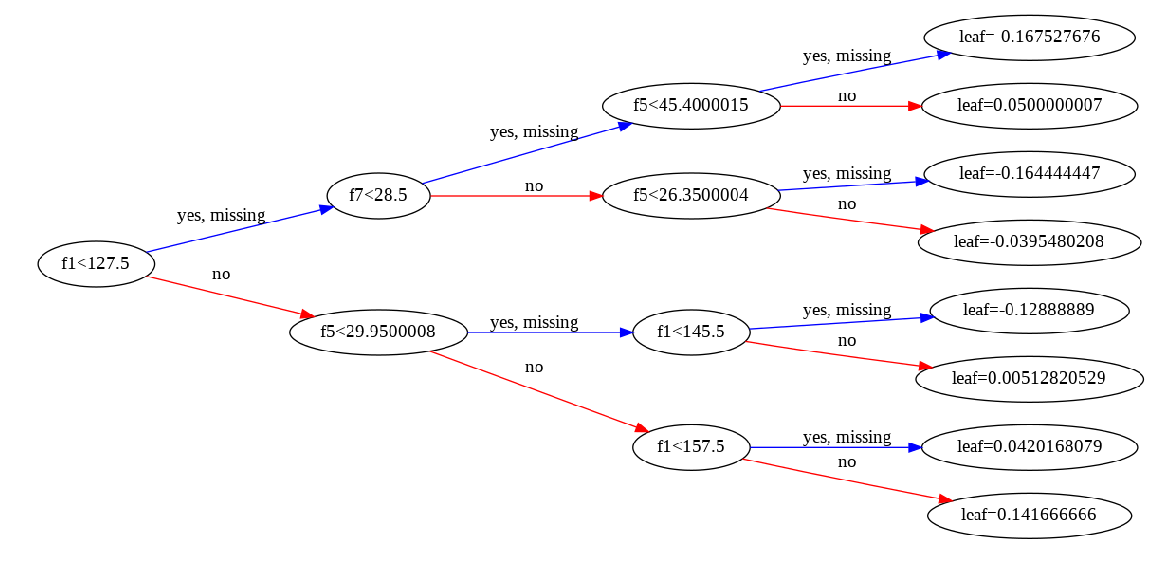

In [31]:
xgb.plot_tree(model,num_trees=0,rankdir="LR")
#plotting 1st boosted tree, from left to right

fig = plt.gcf()
fig.set_size_inches(20,60)

plt.show()

Using XGBoost's Feature Importance Plot

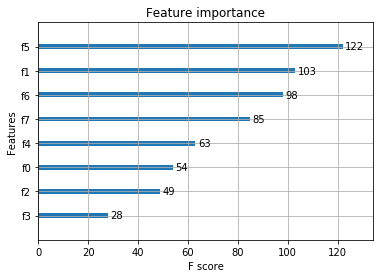

In [44]:
#Plotting Feature Importances

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
# fit model no training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
plot_importance(model)
pyplot.show()

In [49]:
#Feature Selection
from xgboost import *
from sklearn.feature_selection import SelectFromModel
from numpy import sort

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)


# select features using threshold
selection = SelectFromModel(model, threshold=0, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))



# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
print (thresholds)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 77.95%
[0.05761176 0.07284074 0.08265495 0.08399398 0.08581445 0.13343978
 0.14332853 0.34031582]
Thresh=0.058, n=8, Accuracy: 77.95%
Thresh=0.073, n=7, Accuracy: 77.56%
Thresh=0.083, n=6, Accuracy: 78.35%
Thresh=0.084, n=5, Accuracy: 77.95%
Thresh=0.086, n=4, Accuracy: 72.44%
Thresh=0.133, n=3, Accuracy: 74.80%
Thresh=0.143, n=2, Accuracy: 75.98%
Thresh=0.340, n=1, Accuracy: 70.08%
